In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Civil_Service_List__Active.csv')

In [17]:
df.head()

,Exam No,List No,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,Group No,List Agency Code,List Agency Desc,List Div Code,Published Date,Established Date,Anniversary Date,Extension Date,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
0,3528,1138.0,OMAR,NaN,AGUILAR,72.37,70260,LIEUTENANT (POLICE),0,56,POLICE DEPARTMENT,NaN,NaN,12/20/2023,12/20/2027,NaN,NaN,NaN,NaN,NaN
1,6601,24529.0,FRANK,A,GRIFFITH,83.75,91207,CONDUCTOR,0,0,OPEN COMPETITIVE,NaN,NaN,02/14/2018,02/14/2022,02/14/2025,NaN,NaN,NaN,NaN
2,4502,474.0,HENRY,NaN,JABLONSKY,81.03,70392,FIRE MARSHAL (UNIFORMED),0,57,FIRE DEPARTMENT,NaN,NaN,08/06/2014,08/06/2018,08/06/2024,NaN,NaN,NaN,NaN
3,1101,268.0,ANUC,NaN,VELA,80.00,20210,ASSISTANT CIVIL ENGINEER,0,0,OPEN COMPETITIVE,NaN,02/24/2021,09/22/2021,09/22/2025,NaN,NaN,NaN,NaN,NaN
4,2554,119.0,FRANCINE,NaN,WILLIAMS,81.94,82011,SUPERVISOR OF HOUSING CARETAKERS,0,996,N.Y.C. HOUSING AUTHORITY,NaN,NaN,04/19/2023,04/19/2027,NaN,NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491644 entries, 0 to 491643
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Exam No             491644 non-null  int64  
 1   List No             491644 non-null  float64
 2   First Name          491637 non-null  object 
 3   MI                  272355 non-null  object 
 4   Last Name           491636 non-null  object 
 5   Adj. FA             491644 non-null  float64
 6   List Title Code     491644 non-null  int64  
 7   List Title Desc     491644 non-null  object 
 8   Group No            491644 non-null  int64  
 9   List Agency Code    491644 non-null  int64  
 10  List Agency Desc    491644 non-null  object 
 11  List Div Code       0 non-null       float64
 12  Published Date      221816 non-null  object 
 13  Established Date    476875 non-null  object 
 14  Anniversary Date    476875 non-null  object 
 15  Extension Date      222939 non-nul

In [19]:
df.describe()

,Exam No,List No,Adj. FA,List Title Code,Group No,List Agency Code,List Div Code
count,491644.000000,491644.000000,491644.000000,491644.000000,491644.000000,491644.000000,0.0
mean,4779.889670,5390.232978,87.679663,61834.281218,0.004235,34.467928,NaN
std,3012.996821,8919.457474,9.186821,25340.627262,0.064937,166.102187,NaN
min,100.000000,0.200000,65.000000,10001.000000,0.000000,0.000000,NaN
25%,2060.000000,266.000000,80.500000,53052.000000,0.000000,0.000000,NaN
50%,5317.000000,996.000000,88.230000,70210.000000,0.000000,0.000000,NaN
75%,7323.000000,6406.000000,95.000000,70811.000000,0.000000,0.000000,NaN
max,9729.000000,43921.000000,127.270000,92610.000000,1.000000,998.000000,NaN


In [20]:
df.dtypes

Exam No                 int64
List No               float64
First Name             object
MI                     object
Last Name              object
Adj. FA               float64
List Title Code         int64
List Title Desc        object
Group No                int64
List Agency Code        int64
List Agency Desc       object
List Div Code         float64
Published Date         object
Established Date       object
Anniversary Date       object
Extension Date         object
Veteran Credit         object
Parent Lgy Credit      object
Sibling Lgy Credit     object
Residency Credit       object
dtype: object

In [21]:
df.isnull().sum()

Exam No                    0
List No                    0
First Name                 7
MI                    219289
Last Name                  8
Adj. FA                    0
List Title Code            0
List Title Desc            0
Group No                   0
List Agency Code           0
List Agency Desc           0
List Div Code         491644
Published Date        269828
Established Date       14769
Anniversary Date       14769
Extension Date        268705
Veteran Credit        479253
Parent Lgy Credit     490243
Sibling Lgy Credit    491063
Residency Credit      384688
dtype: int64

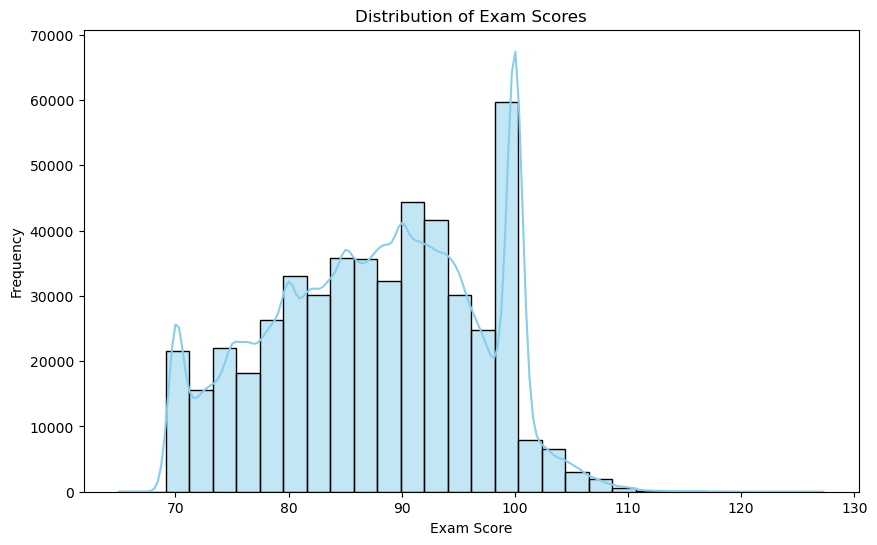

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Adj. FA'],bins=30, kde=True ,color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

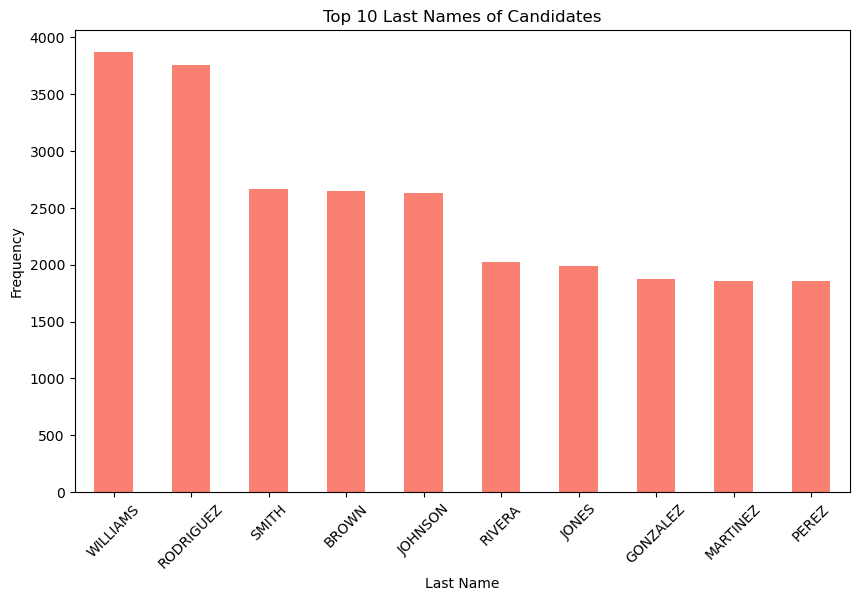

In [25]:
top_last_names = df['Last Name'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
top_last_names.plot(kind='bar', color='salmon')
plt.title('Top 10 Last Names of Candidates')
plt.xlabel('Last Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

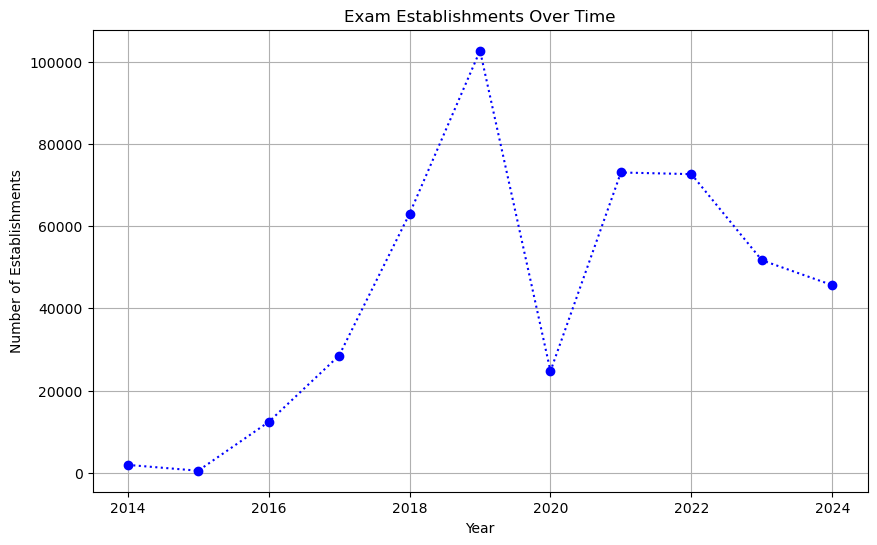

In [48]:
#Convert dates to datetime format 
df['Established Date'] = pd.to_datetime(df['Established Date'])

#Extract year from date
df['Established Year'] = df['Established Date'].dt.year

#Count establishments by year
establishment_counts = df['Established Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
establishment_counts.plot(marker='o', ls=':', color='blue')
plt.title('Exam Establishments Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Establishments')
plt.grid(True)
plt.show()

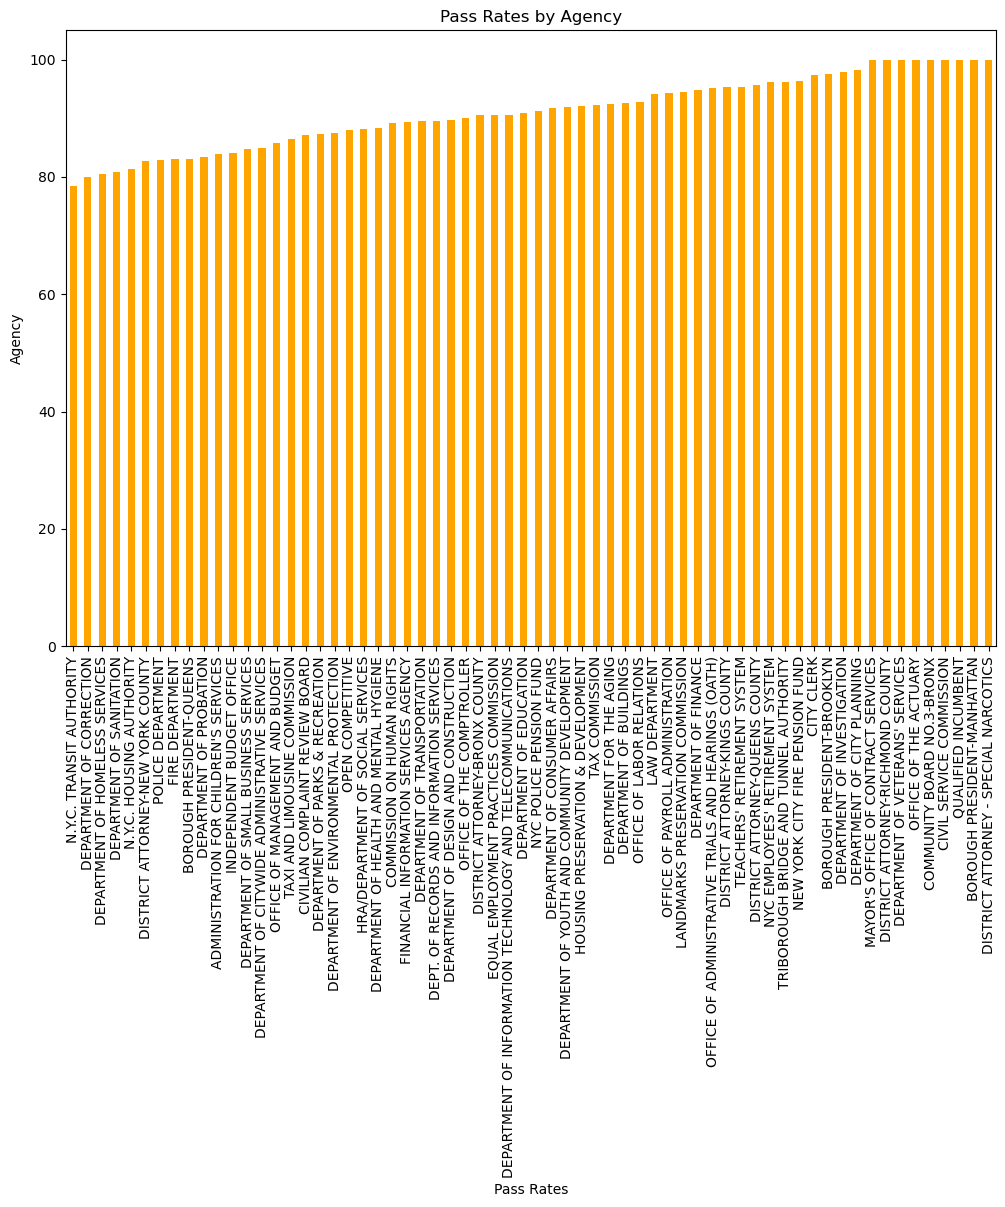

In [58]:
#Calculate pass rates by agency
pass_rates_by_agency = df.groupby('List Agency Desc')['Adj. FA'].mean().sort_values()

#Plotting pass rates
plt.figure(figsize=(12,8))
pass_rates_by_agency.plot(kind='bar', color='orange')
plt.title('Pass Rates by Agency')
plt.xlabel('Pass Rates')
plt.ylabel('Agency')
plt.show()

In [59]:
df['Published Date'] = pd.to_datetime(df['Published Date'])
df['Established Date'] = pd.to_datetime(df['Established Date'])

Text(0, 0.5, 'Frequency')

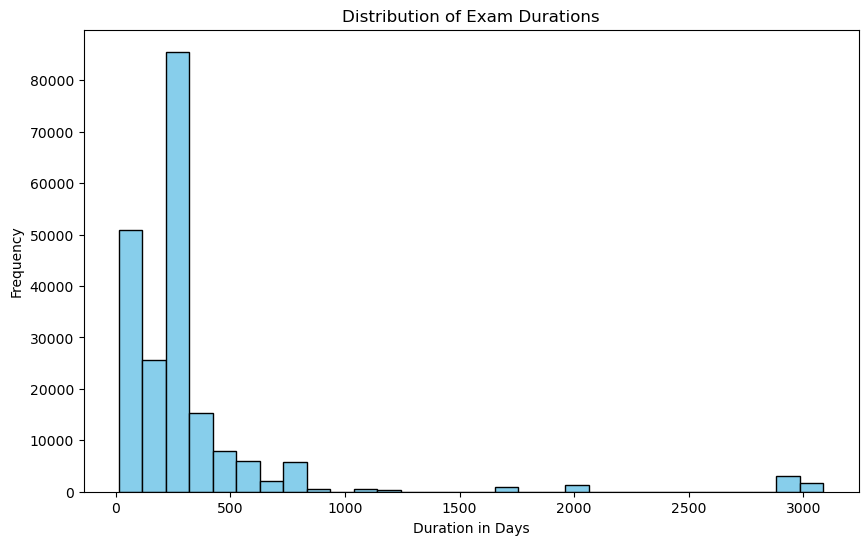

In [61]:
#Calculating duration b/w publication and establishment dates
df['Duration'] = (df['Established Date'] - df['Published Date']).dt.days

#Plotting
plt.figure(figsize=(10,6))
plt.hist(df['Duration'].dropna(), bins=30, color='skyblue', edgecolor='k')
plt.title('Distribution of Exam Durations')
plt.xlabel('Duration in Days')
plt.ylabel('Frequency')

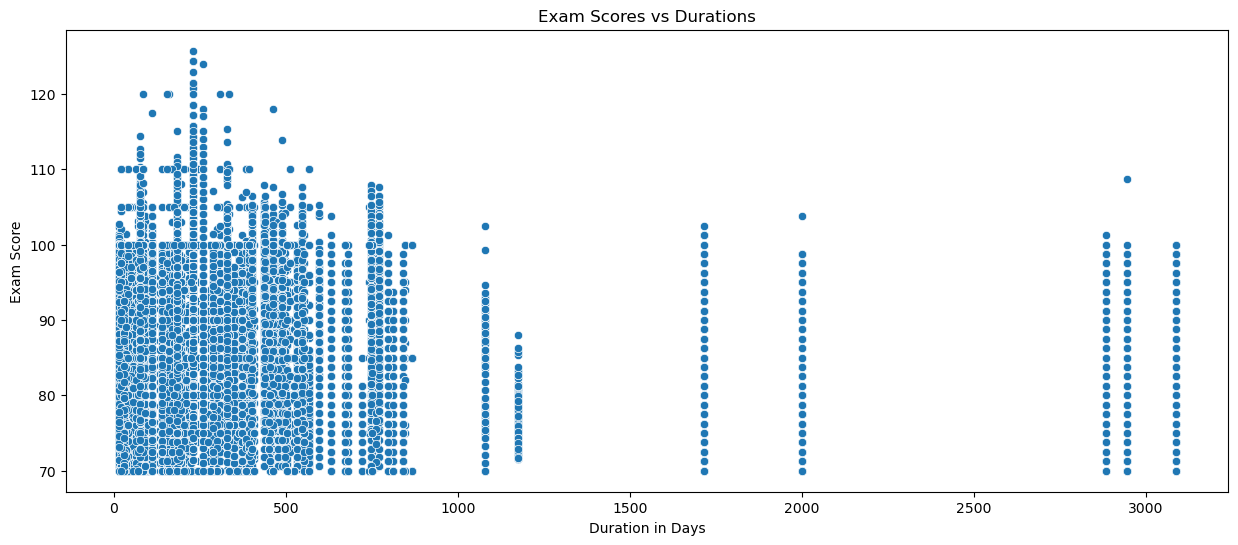

In [62]:
#Scatter Plot for exam scores v/s duration
plt.figure(figsize=(15,6))
sns.scatterplot(x='Duration', y='Adj. FA',data=df)
plt.title('Exam Scores vs Durations')
plt.xlabel('Duration in Days')
plt.ylabel('Exam Score')
plt.show()

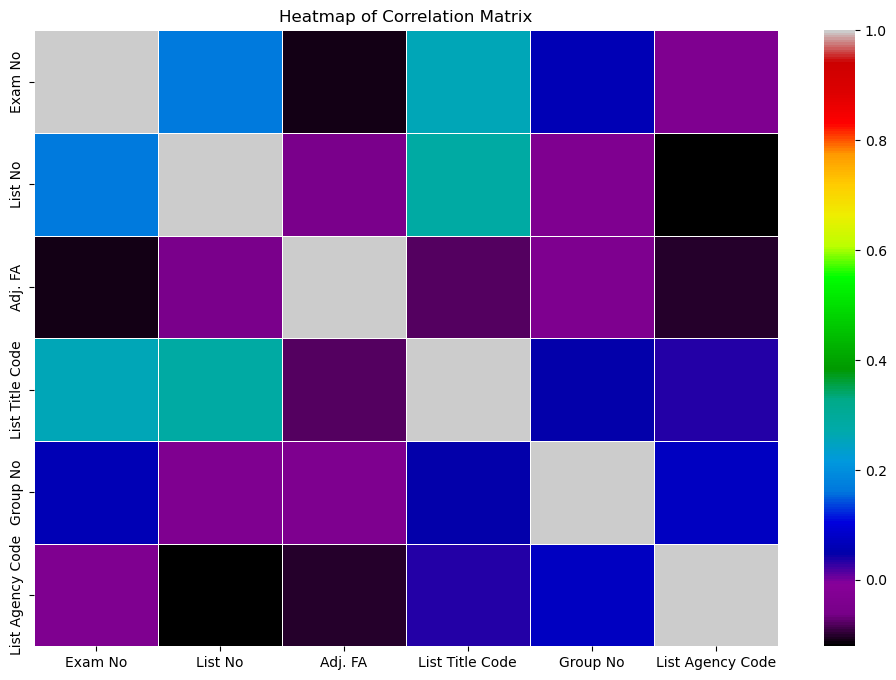

In [72]:
plt.figure(figsize=(12,8))
correlation_matrix = df[['Exam No','List No','Adj. FA','List Title Code','Group No','List Agency Code']].corr()
sns.heatmap(correlation_matrix, cmap='nipy_spectral', linewidth=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()